In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import biomodels_2004140002
from stochastic_tests import Test

t_fin = 1800.0
num_steps = 1800

test = Test(model=biomodels_2004140002(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=True)

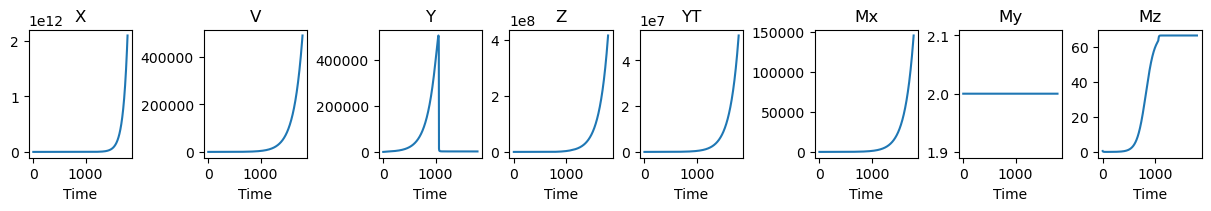

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

Stochastic simulation results can be treated as a distribution with statistical properties such as mean and standard deviation. Distributions should become smooth with increasing number of trials. 

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

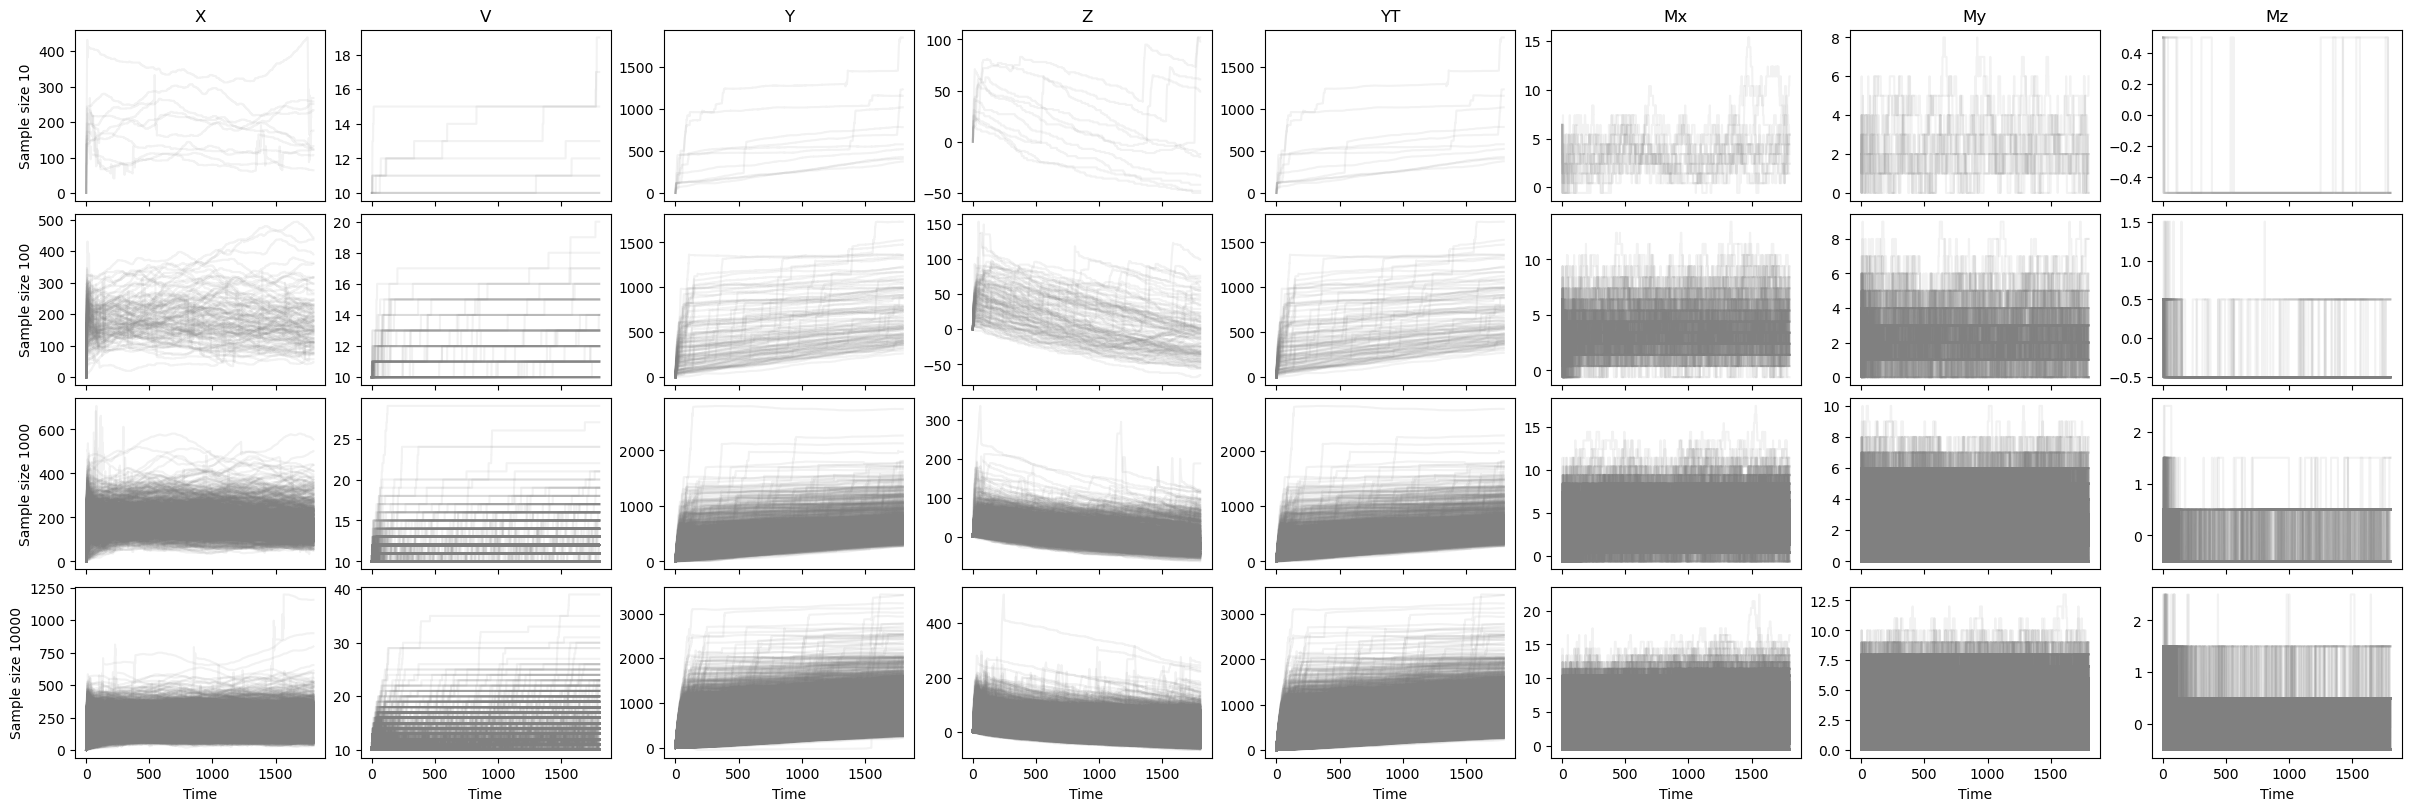

In [4]:
_ = test.plot_results_stochastic(False)

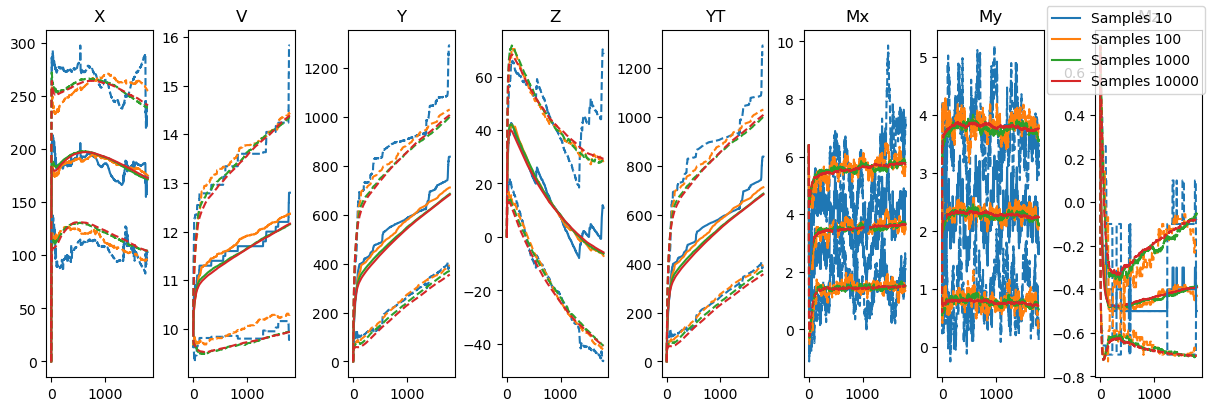

In [5]:
_ = test.plot_stats()

If we bin replicate results at each sample time, we should find that the probability distribution function of a variable at each time point converges with increasing number of replicates. 

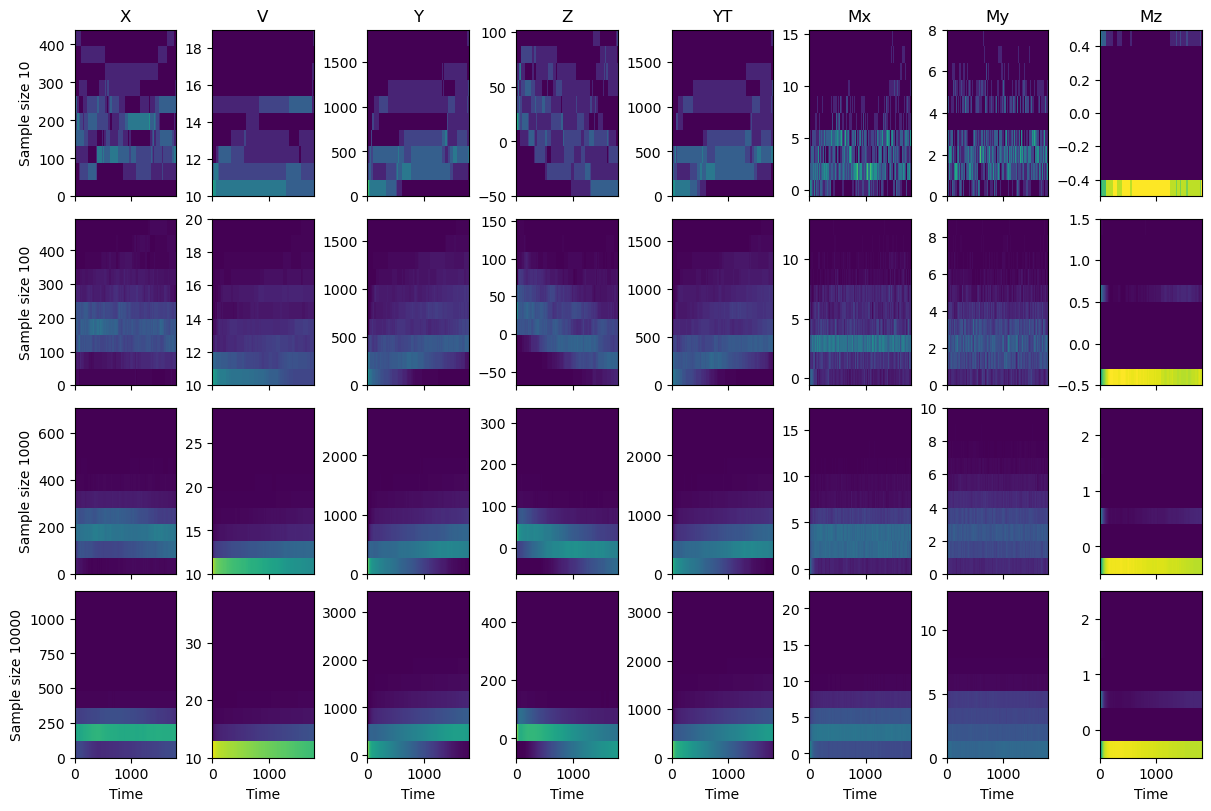

In [6]:
_ = test.plot_distributions()

Results distributions should converge as the number of trials increases. At any sampled simulation time, convergence appears as a distribution that converges with increasing number of trials. Convergence can be quantified by measuring the change in distribution for an increase in number of trials. We should find that the change in distribution goes to zero everywhere as the number of trials increases. 

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	X: 1.7878069342664753
	V: 1.5993218658919104
	Y: 1.730852593595816
	Z: 1.8026263966671392
	YT: 1.706638330582431
	Mx: 2.0
	My: 2.0
	Mz: 1.1996649794614778
100 trials
	X: 0.6054687692150352
	V: 0.47997655206532513
	Y: 0.6413280395358418
	Z: 0.5715388894707023
	YT: 0.6152961586648611
	Mx: 0.6799942527636044
	My: 0.6797566176642552
	Mz: 0.5199989685020967
1000 trials
	X: 0.20170521712894723
	V: 0.1356732153307526
	Y: 0.15985204889552065
	Z: 0.18344243016867748
	YT: 0.1594462849304474
	Mx: 0.24279614775381886
	My: 0.24379790064554863
	Mz: 0.09599189042432837
10000 trials
	X: 0.0640162589892664
	V: 0.05049012258318723
	Y: 0.05665519509827964
	Z: 0.05770118302062326
	YT: 0.055369810017092624
	Mx: 0.07795059495539285
	My: 0.0826851588328263
	Mz: 0.023999271462116865


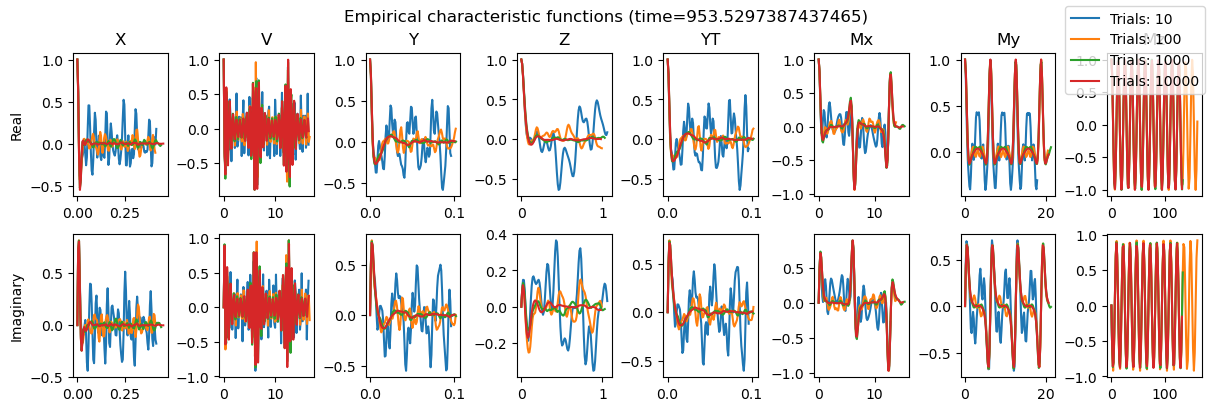

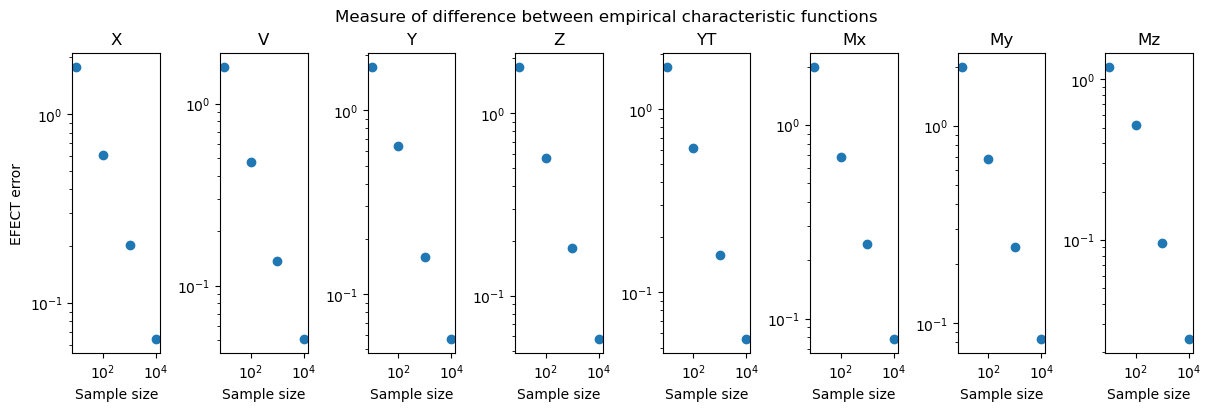

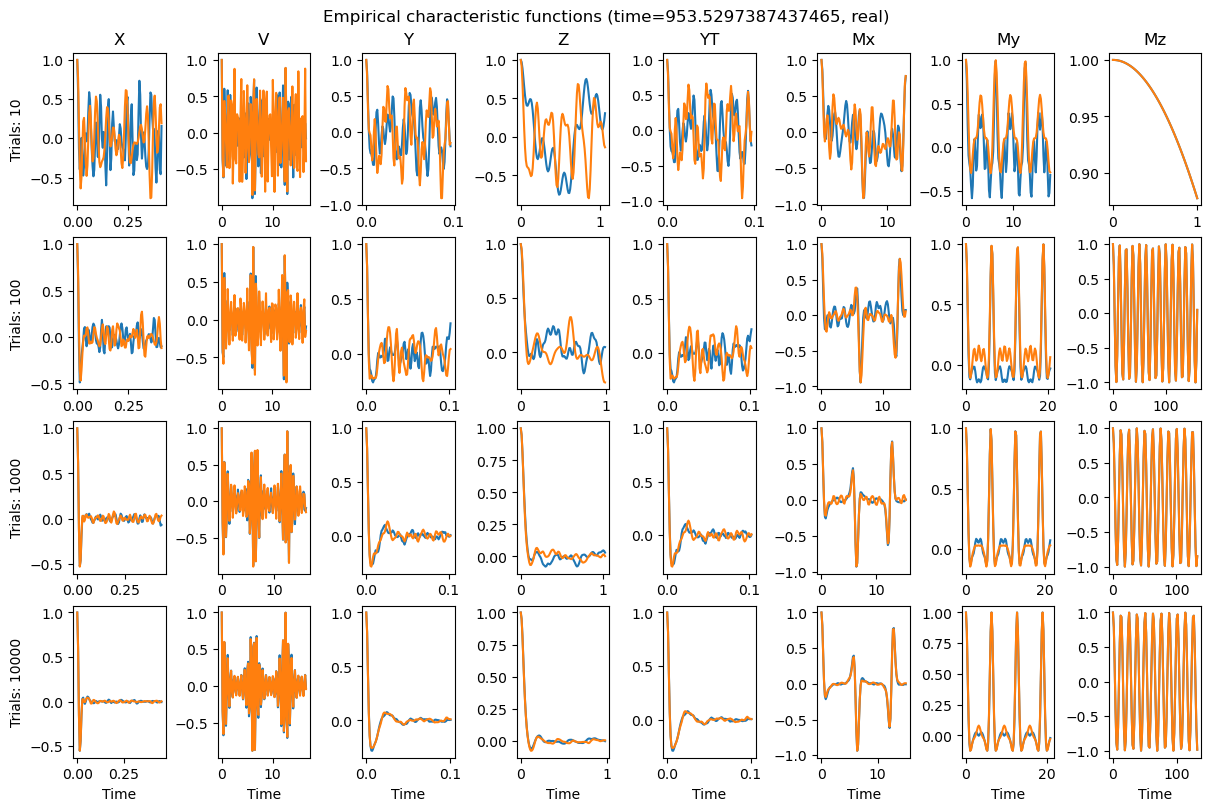

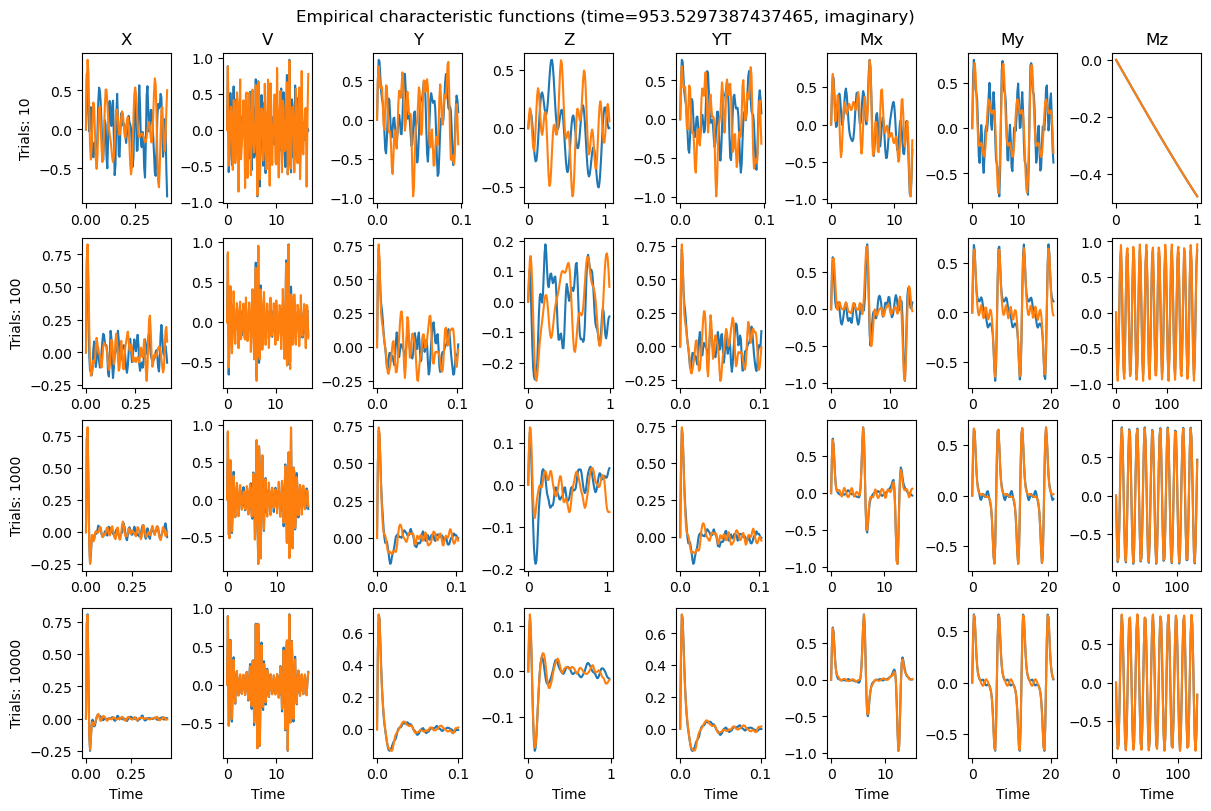

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

C:\Users\timothy.sego\AppData\Local\miniconda3\envs\stoch_repro\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


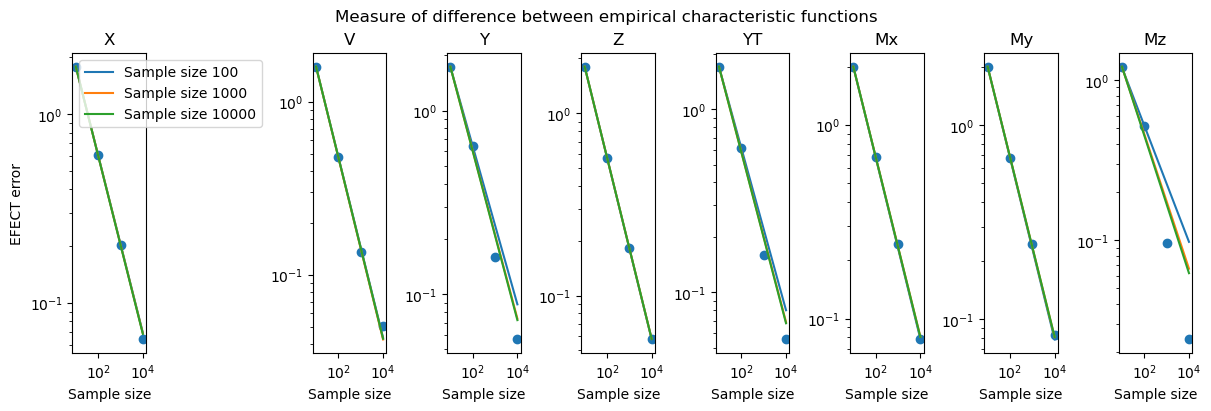

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~433 minutes (tower)
test.test_sampling(err_thresh=1E-3)

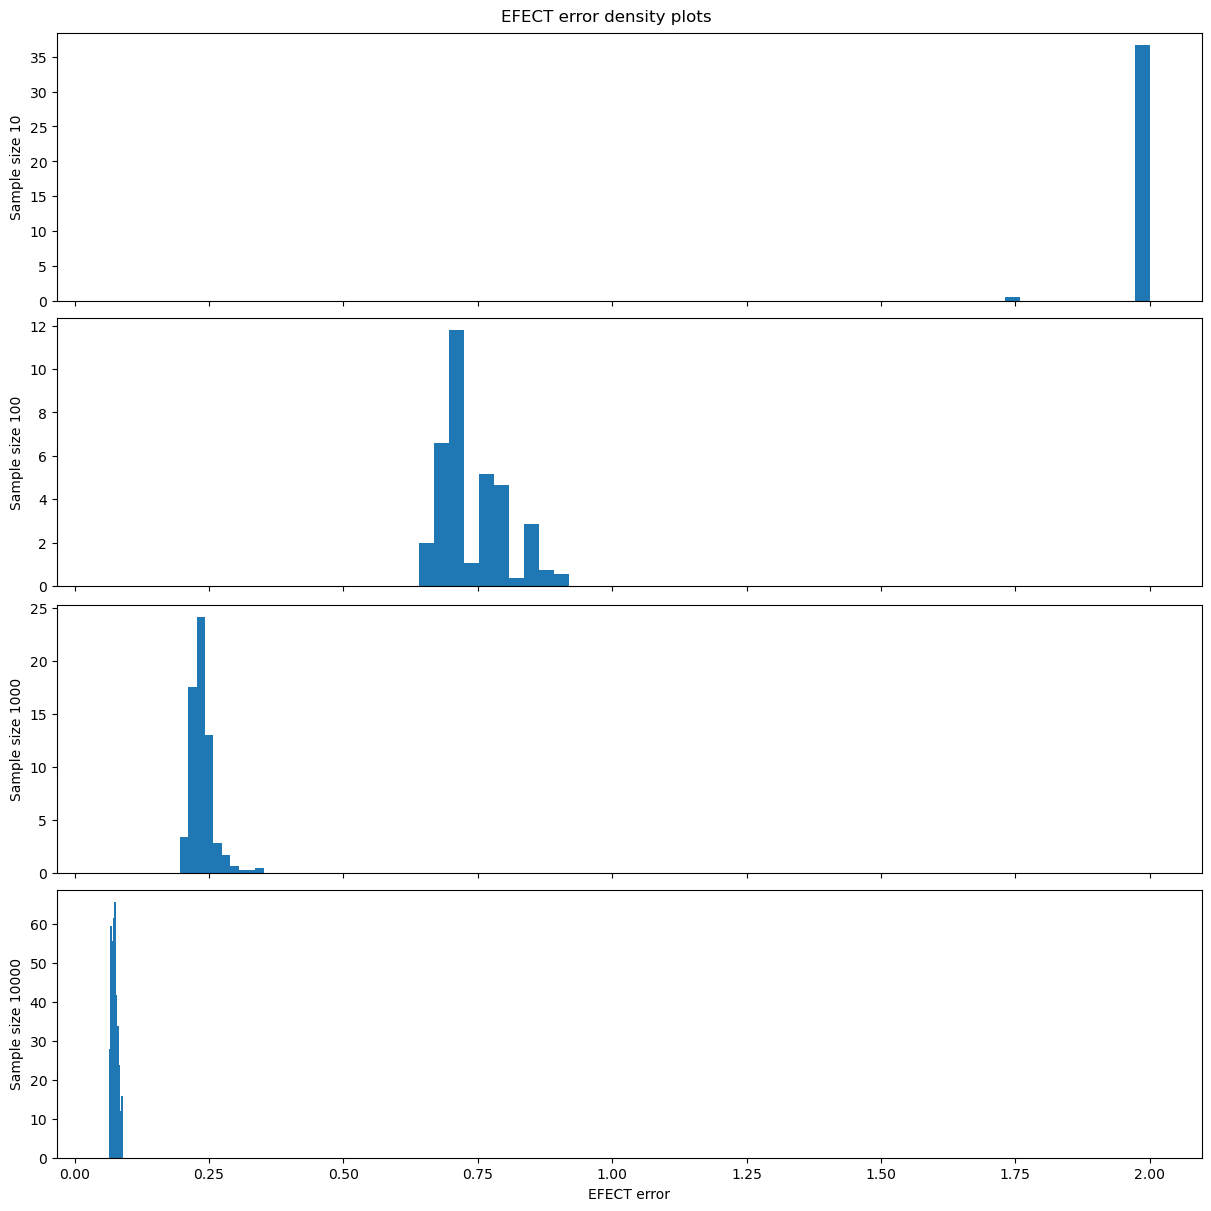

In [13]:
_ = test.plot_ks_sampling()

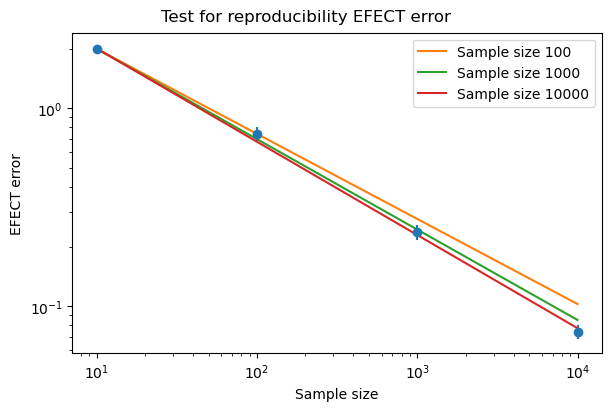

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()